In [1]:
#define as bibliotecas/pacotes a serem utilizadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mapFeature import mapFeature
from costFunctionReg import costFunctionReg
from plotDecisionBoundary import plotDecision

In [2]:
def importarDados(insertOnes=True, filepath='/data/ex2data2.txt', names=['Teste 1', 'Teste 2', 'Aceito']):
    path = os.getcwd() + filepath
    data = pd.read_csv(path, header=None, names=names)

    # A primeira coluna, preenchida com 1's, represenhta o theta0
    if insertOnes:
        data.insert(0, 'Ones', 1)

    # converte de dataframes para arrays
    cols = data.shape[1]
    X = data.iloc[:, 0:cols - 1]
    y = data.iloc[:, cols - 1:cols]

    # converte de arrays para matrizes
    X = np.array(X.values)
    y = np.array(y.values)

    return data, X, y

In [3]:
def plot(data, filename = 'target/plot4.1.png'):

    # gerando o gráfico de dispersão dos dados

    positivo = data[data['Aceito'].isin([1])]
    negativo = data[data['Aceito'].isin([0])]

    fig, ax = plt.subplots(figsize=(7,4))
    ax.axis([-1, 1.5, -0.8, 1.2])
    ax.scatter(positivo['Teste 1'], positivo['Teste 2'], s=50, c='k', marker='+', label='y=1')
    ax.scatter(negativo['Teste 1'], negativo['Teste 2'], s=50, c='y', marker='o', label='y=0')
    ax.legend()
    ax.set_xlabel('Microchip Test 1')
    ax.set_ylabel('Microchip Test 2')

    if not os.path.exists(os.path.dirname(filename)):
        os.makedirs(os.path.dirname(filename))

    plt.savefig(filename)
    plt.show()

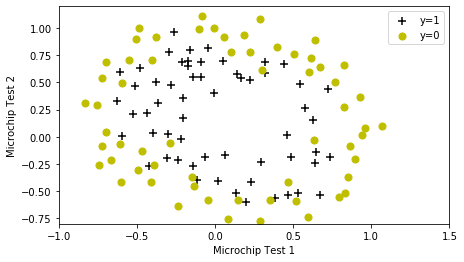

In [4]:
#armazena os dados retornadas pela função de leitura em cada variável
data, X, y=importarDados()
#chama função para plotagem de gráfico
plot(data)

In [5]:
#escolhe os valores que serão utilizados no mapeamento de features, nesse caso, X
datamap=X[:, 1:]
#chama a função criada para mapear features, informando os valores de X e do índice a ser usado no mapeamento
mapa=mapFeature(datamap, indice=6)
#mapa criado do primeiro par de características
print (mapa[0])

[1.00000000e+00 5.12670000e-02 6.99560000e-01 2.62830529e-03
 3.58643425e-02 4.89384194e-01 1.34745327e-04 1.83865725e-03
 2.50892595e-02 3.42353606e-01 6.90798869e-06 9.42624411e-05
 1.28625106e-03 1.75514423e-02 2.39496889e-01 3.54151856e-07
 4.83255257e-06 6.59422333e-05 8.99809795e-04 1.22782870e-02
 1.67542444e-01 1.81563032e-08 2.47750473e-07 3.38066048e-06
 4.61305487e-05 6.29470940e-04 8.58939846e-03 1.17205992e-01]


In [6]:
#valores iniciais de theta, para total de valores mapeados
theta=np.zeros(mapa.shape[1])

In [7]:
#valor de custo para lamb = 1 e theta = 0
J, gd = costFunctionReg(mapa, y, theta, 1)
print ('Custo', J, 'valores de theta', gd)

Custo 0.6931471805599454 valores de theta [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]


In [8]:
#implementando a função de custo, usando os valores de theta encontrados no cálculo com lambda = 1, e alternando
#o valor de lambda para 0 e 100, nota-se que o custo dessas implementações são maiores que a anterior.
j0, gd0 = costFunctionReg(mapa, y, gd, 0)
j100, g100 = costFunctionReg(mapa, y, gd, 100)
print (j0, j100)

0.706838620914913 0.712232194843085


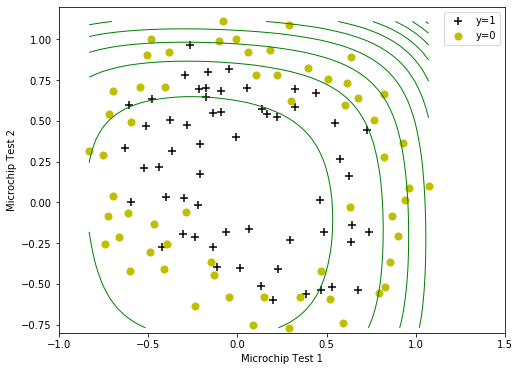

In [9]:
plotDecision(data, X, gd, filename = 'target/plot4.4.png')
#ax.contour(theta0, theta1, J, levels=np.logspace(-1, 4, 20)) - > código contourn do exercício 1